In [74]:
# create df and analyze
import pandas as pd

df = pd.read_csv('/Users/bsg25/metricalgpt/corpora_and_scansions/4o latest results/merged_to_analyze_4o_latest.csv')

In [75]:
## clean up df
# Replace - with W and + with S in meter and stress
df['meter_y'] = df['meter_y'].str.replace('-', 'W').str.replace('+', 'S')
df['stress'] = df['stress'].str.replace('-', 'W').str.replace('+', 'S')

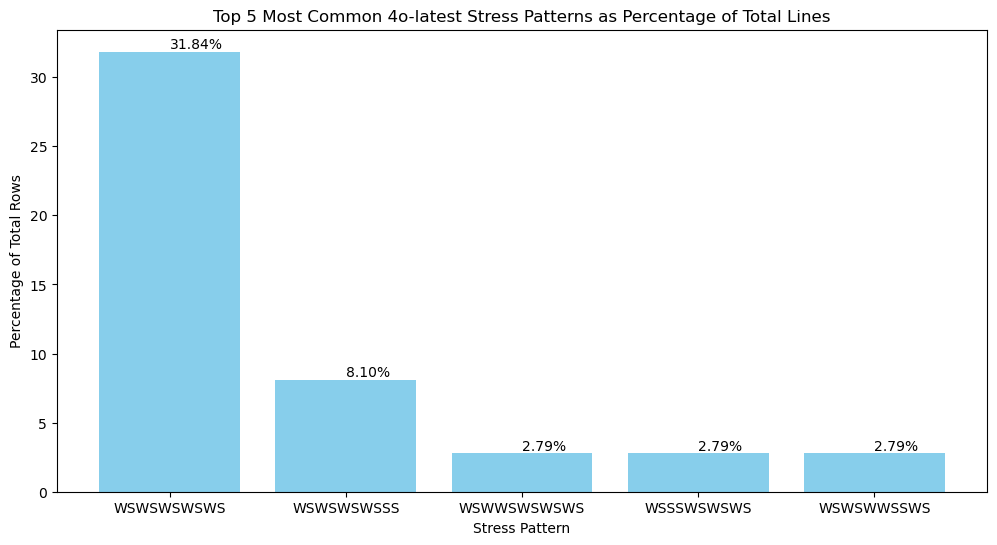

In [76]:
# Calculate the frequency of each stress pattern
stress_counts = df['stress'].value_counts().head(5)
# Calculate the percentage of each stress pattern
stress_percentage = (stress_counts / len(df)) * 100
# Plotting the graph
plt.figure(figsize=(12, 6))
bars = plt.bar(stress_percentage.index, stress_percentage.values, color='skyblue')
plt.xlabel('Stress Pattern')
plt.ylabel('Percentage of Total Rows')
plt.title('Top 5 Most Common 4o-latest Stress Patterns as Percentage of Total Lines')
# Label each bar with the percentage value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', va='bottom')

plt.show()

In [88]:
## clean up df
# Replace - with W and + with S in meter and stress

import pandas as pd

o1df = pd.read_csv('/Users/bsg25/metricalgpt/corpora_and_scansions/o1_mini results/IPanimals.csv')
o1df['meter'] = o1df['meter_y'].str.replace('-', 'W').str.replace('+', 'S')
o1df['stress'] = o1df['stress'].str.replace('-', 'W').str.replace('+', 'S')
o1df = o1df.dropna(subset=['txt'])

In [94]:
# Define the substring to search for
substring = 'WWW'

# Function to calculate the percentage of rows containing the substring in the 'stress' column
def calculate_percentage(df, substring):
    total_rows = len(df)
    substring_count = df['stress'].str.contains(substring).sum()
    percentage = (substring_count / total_rows) * 100
    return percentage

# Group by 'variation' and calculate the percentage for each group
variation_percentage = df.groupby('variation').apply(lambda x: calculate_percentage(x, substring)).reset_index()
variation_percentage.columns = ['variation', 'percentage']
print(variation_percentage)

                                   variation  percentage
0                                       none    6.849315
1                  with a trochaic inversion   11.842105
2  with a trochaic inversion after a caesura    1.666667
3             with an inverted metrical foot    1.351351
4                    with rhythmic variation    5.333333


/var/folders/q0/7d7kf7n56nb1dvl9z19dkhnmw0xmy9/T/ipykernel_37933/99382790.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  variation_percentage = df.groupby('variation').apply(lambda x: calculate_percentage(x, substring)).reset_index()


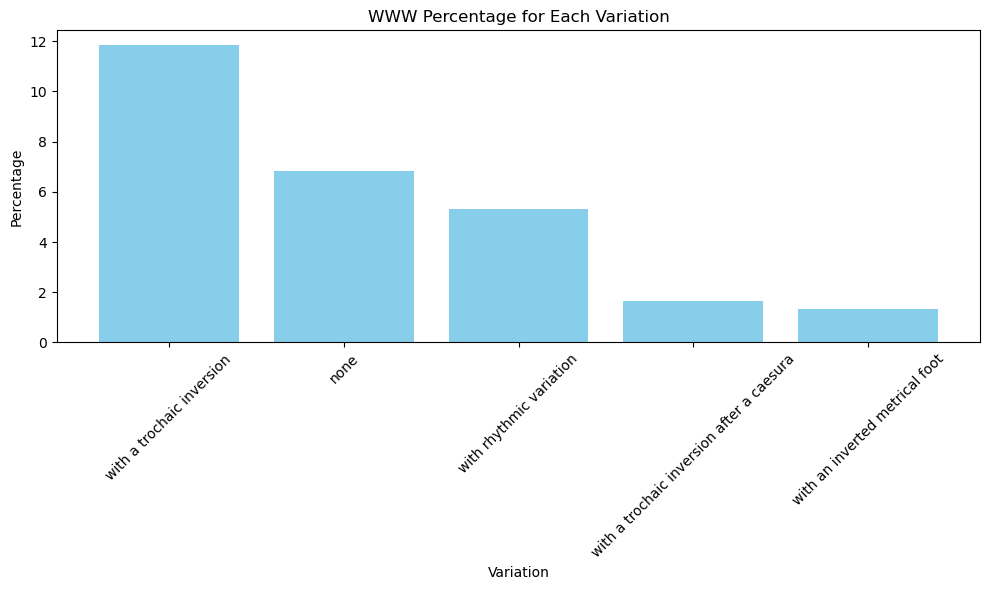

In [95]:
import matplotlib.pyplot as plt

# Sort the variation_percentage DataFrame in descending order
variation_percentage = variation_percentage.sort_values(by='percentage', ascending=False)

# Plot the variation percentage
plt.figure(figsize=(10, 6))
plt.bar(variation_percentage['variation'], variation_percentage['percentage'], color='skyblue')
plt.xlabel('Variation')
plt.ylabel('Percentage')
plt.title('WWW Percentage for Each Variation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

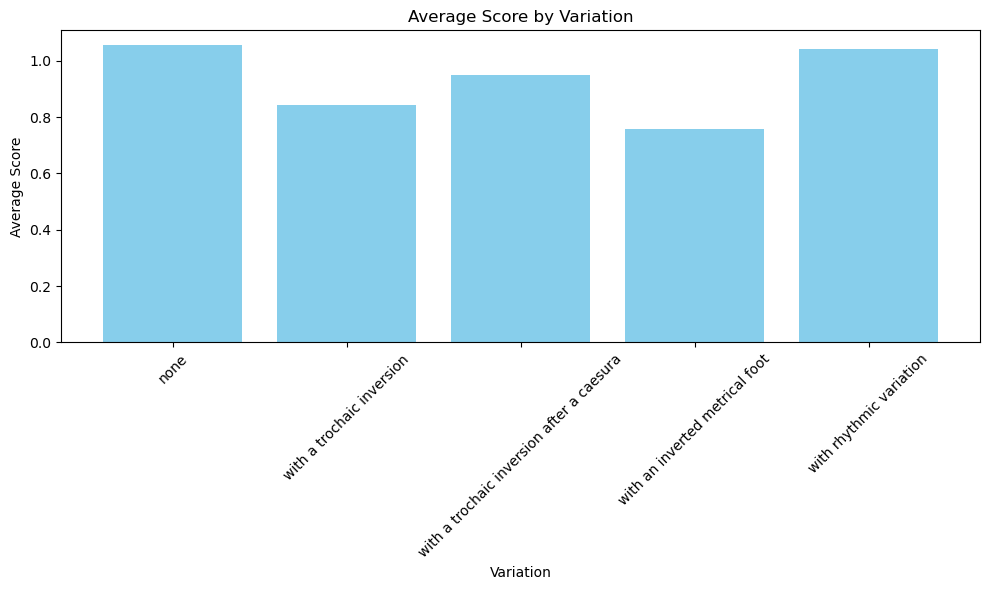

In [45]:
import matplotlib.pyplot as plt
# Calculate average score by variation
df_avg_score = df.groupby('variation')['score'].mean().reset_index()
# Plot the average score by variation
plt.figure(figsize=(10, 6))
plt.bar(df_avg_score['variation'], df_avg_score['score'], color='skyblue')
plt.xlabel('Variation')
plt.ylabel('Average Score')
plt.title('Average Score by Variation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

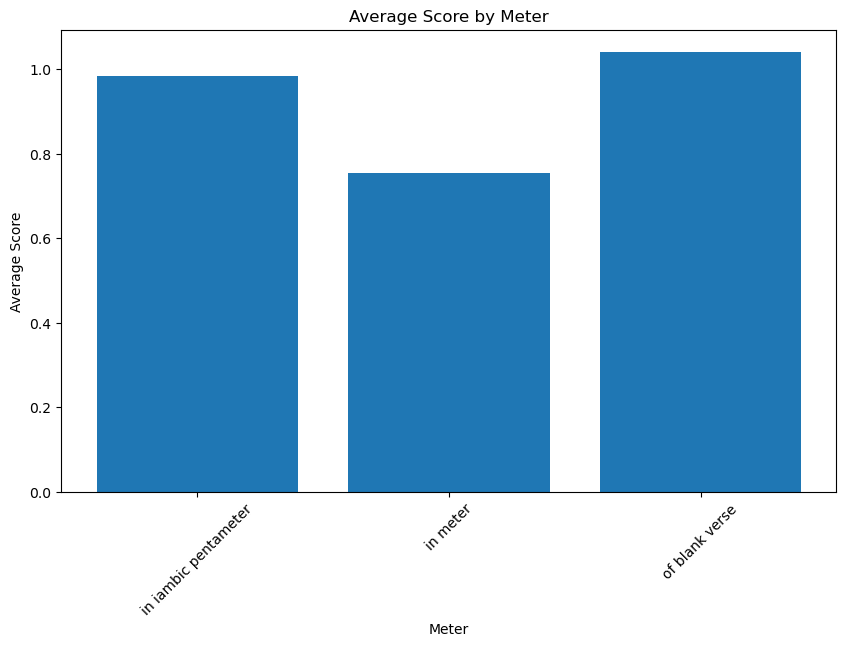

In [46]:
import matplotlib.pyplot as plt
# Calculate average score by meter_x
df_avg_score = df.groupby('meter_x')['score'].mean().reset_index()
# Plot the average score by meter_x
plt.figure(figsize=(10, 6))
plt.bar(df_avg_score['meter_x'], df_avg_score['score'])
plt.xlabel('Meter')
plt.ylabel('Average Score')
plt.title('Average Score by Meter')
plt.xticks(rotation=45)
plt.show()

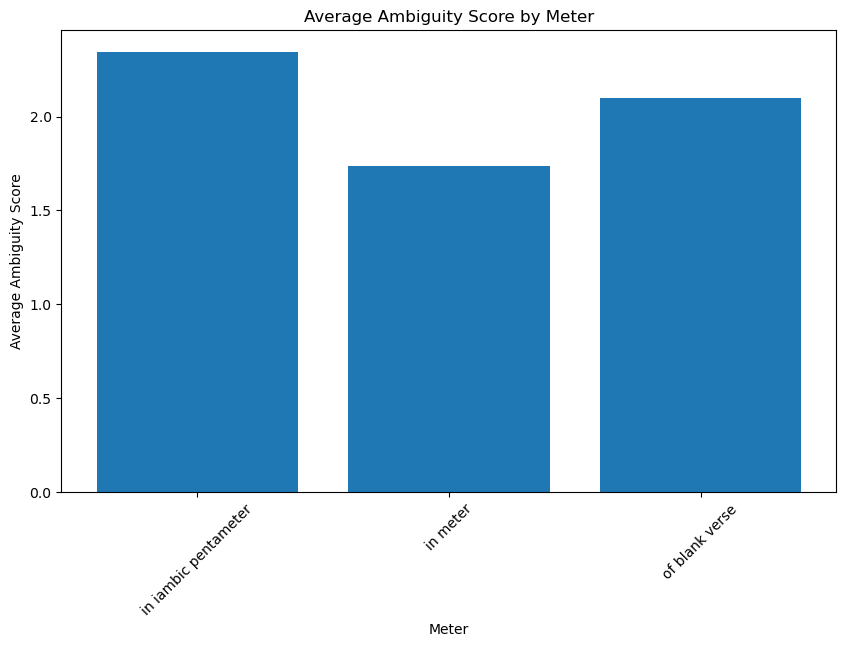

In [47]:
import matplotlib.pyplot as plt
# Calculate average ambiguity score by meter_x
df_avg_ambig = df.groupby('meter_x')['ambig'].mean().reset_index()
# Plot the average ambiguity score by meter_x
plt.figure(figsize=(10, 6))
plt.bar(df_avg_ambig['meter_x'], df_avg_ambig['ambig'])
plt.xlabel('Meter')
plt.ylabel('Average Ambiguity Score')
plt.title('Average Ambiguity Score by Meter')
plt.xticks(rotation=45)
plt.show()

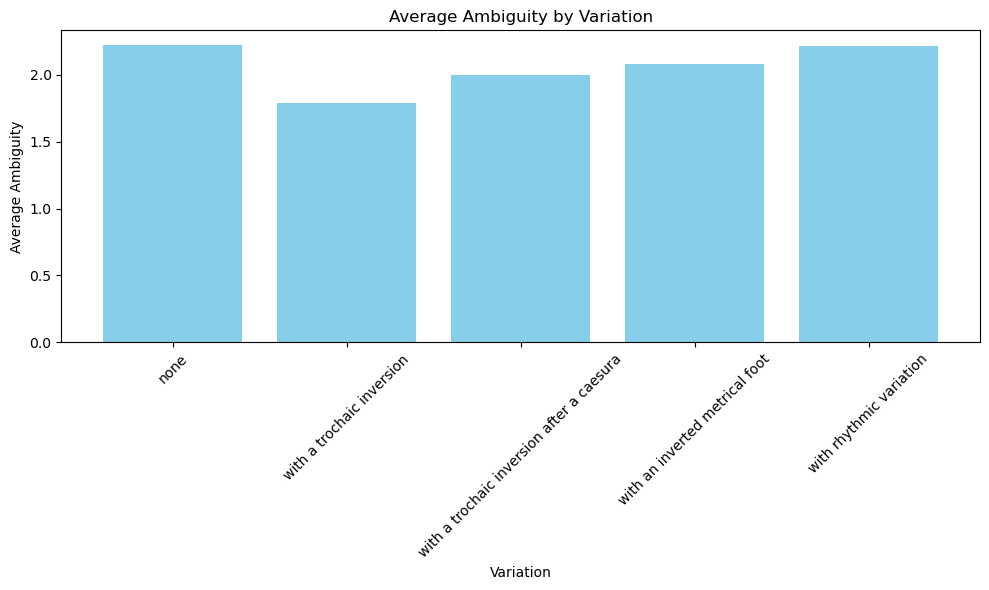

In [48]:
import matplotlib.pyplot as plt
# Calculate average ambiguity by variation
df_avg_ambig = df.groupby('variation')['ambig'].mean().reset_index()
# Plot the average ambiguity by variation
plt.figure(figsize=(10, 6))
plt.bar(df_avg_ambig['variation'], df_avg_ambig['ambig'], color='skyblue')
plt.xlabel('Variation')
plt.ylabel('Average Ambiguity')
plt.title('Average Ambiguity by Variation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
# Replace "-" with "W" and "+" with "S" in "meter_y" and "stress"
df["meter_y"] = df["meter_y"].str.replace("-", "W").str.replace("+", "S")
df["stress"] = df["stress"].str.replace("-", "W").str.replace("+", "S")

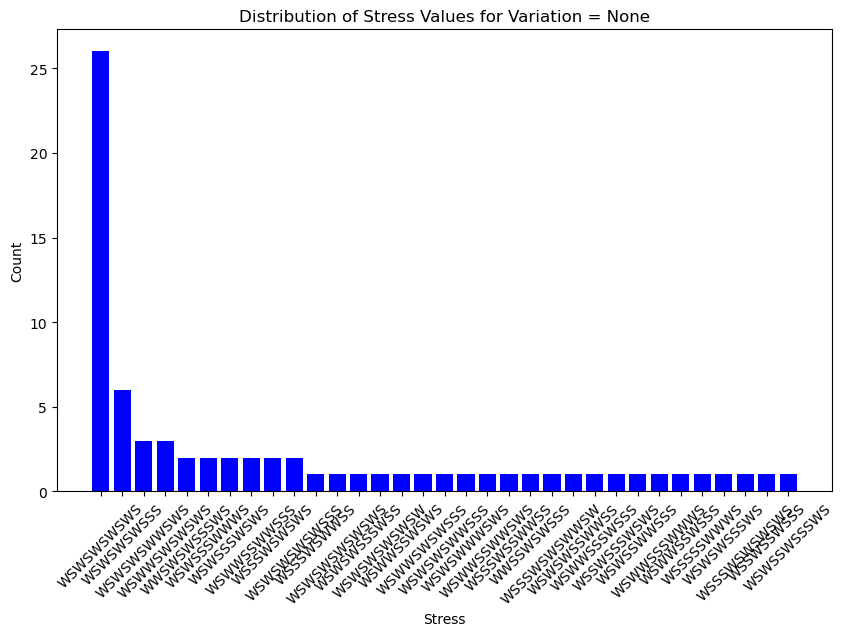

In [50]:
import matplotlib.pyplot as plt
# Filter for variation = 'none' and show distribution of stress values
df_filtered = df[df['variation'] == 'none']
df_distribution = df_filtered['stress'].value_counts().reset_index()
df_distribution.columns = ['stress', 'count']
# Plot the distribution of stress values
plt.figure(figsize=(10, 6))
plt.bar(df_distribution['stress'], df_distribution['count'], color='blue')
plt.xlabel('Stress')
plt.ylabel('Count')
plt.title('Distribution of Stress Values for Variation = None')
plt.xticks(rotation=45)
plt.show()

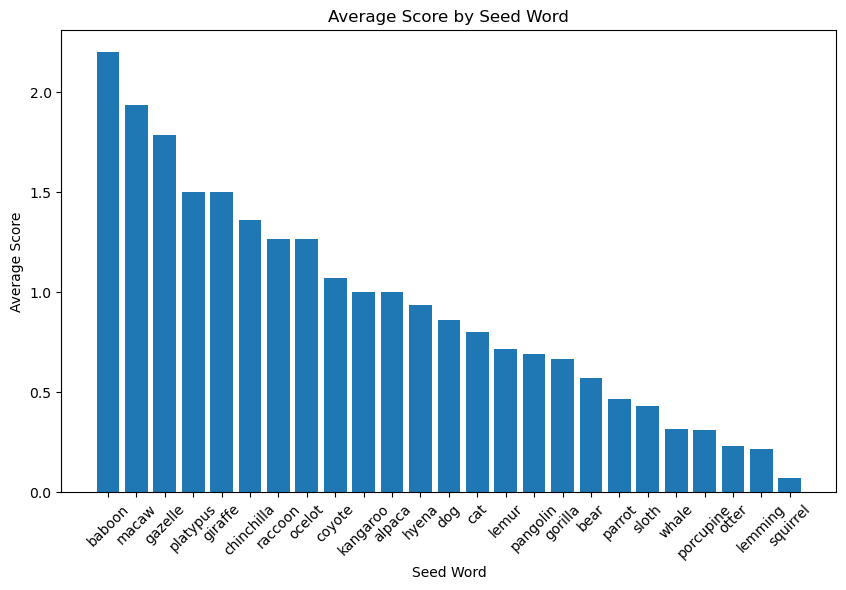

In [51]:
import matplotlib.pyplot as plt
# Calculate average score by seed_word in descending order
df_avg_score = df.groupby('seed_word')['score'].mean().reset_index().sort_values(by='score', ascending=False)
# Plot the average score by seed_word
plt.figure(figsize=(10, 6))
plt.bar(df_avg_score['seed_word'], df_avg_score['score'])
plt.xlabel('Seed Word')
plt.ylabel('Average Score')
plt.title('Average Score by Seed Word')
plt.xticks(rotation=45)
plt.show()

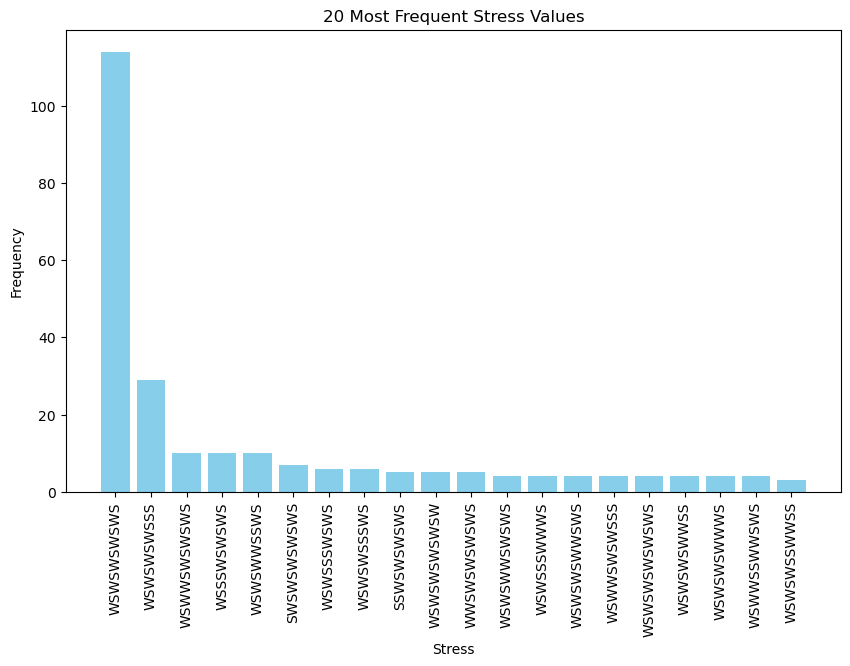

In [52]:
import matplotlib.pyplot as plt
# Display 20 most frequent stress values
df2 = df['stress'].value_counts().head(20).reset_index()
df2.columns = ['stress', 'frequency']
# Plotting the 20 most frequent stress values
plt.figure(figsize=(10, 6))
plt.bar(df2['stress'], df2['frequency'], color='skyblue')
plt.xlabel('Stress')
plt.ylabel('Frequency')
plt.title('20 Most Frequent Stress Values')
plt.xticks(rotation=90)
plt.show()

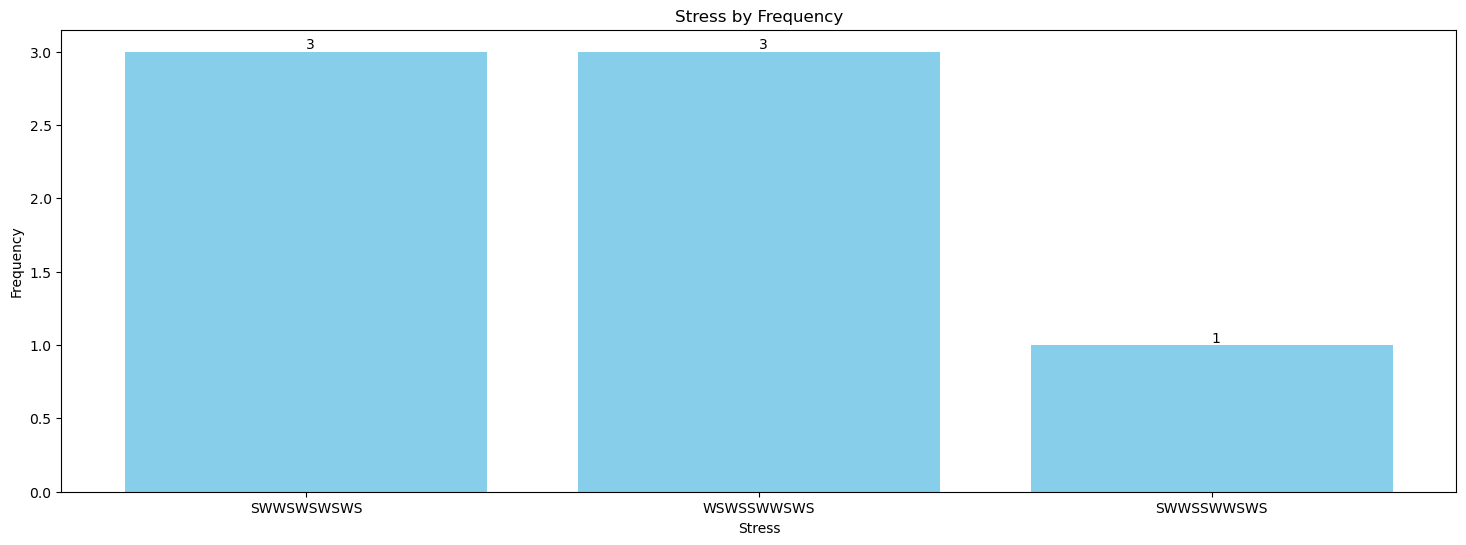

In [53]:
stress_patterns = ['SWWSWSWSWS', 'WSSWWSWSWS', 'WSWSSWWSWS', 'WSWSWSSWWS', 'WSWSWSWSSW', 'SWWSSWWSWS', 'WSSWWSSWWS', 'SWSWWSWSWS', 'WSSWSWWSWS', 'SWWSWWWSWS']
trocheedf = df[df['stress'].isin(stress_patterns)]


import matplotlib.pyplot as plt
# Group by 'stress' and count frequencies
stress_frequency = trocheedf['stress'].value_counts().reset_index()
stress_frequency.columns = ['stress', 'frequency']
# Plotting the graph with logarithmic scale
plt.figure(figsize=(18, 6))
bars = plt.bar(stress_frequency['stress'], stress_frequency['frequency'], color='skyblue')

plt.xlabel('Stress')
plt.ylabel('Frequency')
plt.title('Stress by Frequency')
# Label each bar with total count
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom') 

plt.show()

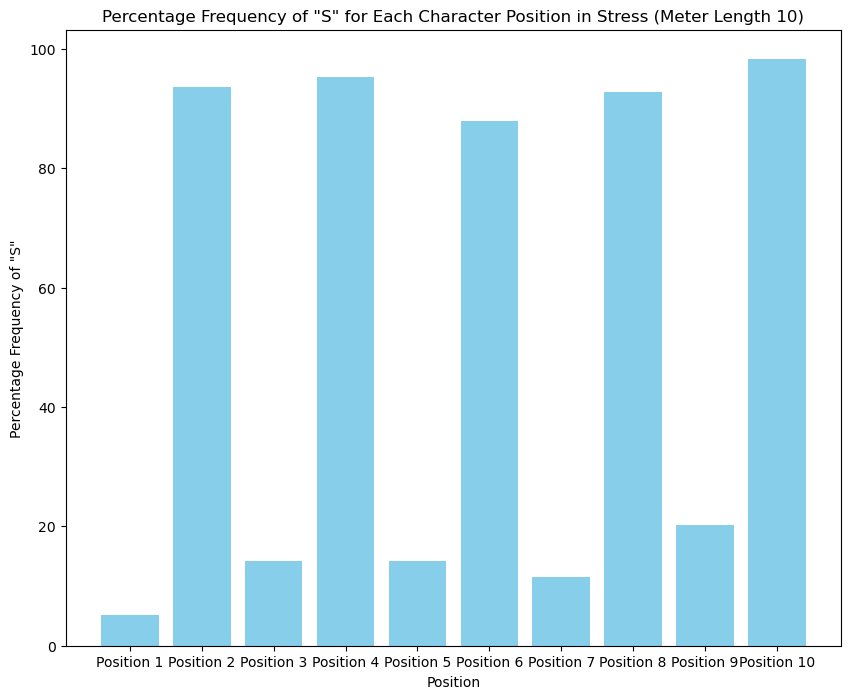

In [54]:
import matplotlib.pyplot as plt
# Filter rows where meter length is 10
decadf = df[df['meter_y'].str.len() == 10]
# Calculate percentage frequency of 'S' for each character position in 'stress'
frequency = {f'Position {i+1}': (decadf['stress'].str[i].value_counts().get('S', 0) / len(decadf)) * 100 for i in range(10)}
# Convert the result to a DataFrame
decadf = pd.DataFrame(list(frequency.items()), columns=['Position', 'Percentage Frequency'])
# Plot the percentage frequency of '+' for each character position
plt.figure(figsize=(10, 8))
plt.bar(decadf['Position'], decadf['Percentage Frequency'], color='skyblue')
plt.xlabel('Position')
plt.ylabel('Percentage Frequency of "S"')
plt.title('Percentage Frequency of "S" for Each Character Position in Stress (Meter Length 10)')
plt.show()

In [61]:
def calculate_percentage(df, substring):
    total_stress_values = len(df['stress'])
    substring_count = df['stress'].str.contains(substring).sum()
    percentage = (substring_count / total_stress_values) * 100
    return percentage

# Example usage
substring = 'SS'
percentage = calculate_percentage(df, substring)
print(f"Percentage of 'stress' values that contain '{substring}': {percentage:.2f}%")

Percentage of 'stress' values that contain 'SS': 50.00%


In [73]:
substring = 'WSWSWSWS'
print(calculate_percentage(trochaicdf, substring))
print(calculate_percentage(bigdf, substring))

51.470588235294116
40.35243494296837


In [33]:
import pandas as pd

bigdf = pd.read_csv('/Users/bsg25/metricalgpt/corpora_and_scansions/ECPA_data_and_parses/ecep_parsed.csv')
bigdf['meter'] = bigdf['meter'].str.replace('-', 'W').str.replace('+', 'S')
bigdf['stress'] = bigdf['stress'].str.replace('-', 'W').str.replace('+', 'S')

In [68]:
trochaicdf = df[df['variation'].str.contains('trochaic', case=False, na=False)]

In [ ]:
trochaicdf